<a href="https://colab.research.google.com/github/gongx030/seatac_manuscript/blob/main/Vplot_demo_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Define Vplot, Vplot binning, genomic bin, fragment size bin and fragment size profile.

In [ ]:
start_time <- Sys.time()

### Install external packages

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [ ]:
system('apt-get install libcairo2-dev', intern = TRUE) # required by R package ComplexHeatmap 

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

In [ ]:
system('apt-get install libmagick++-dev', intern = TRUE) # required by magick
system('apt-get install libmagick-dev', intern = TRUE) # for magick

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
  [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
  [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
  [5] "  fonts-droid-fallback fonts-noto-mono ghostscript gir1.2-freedesktop"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
  [6] "  gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 gsfonts imagemagick-6-common"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
  [7] "  libcupsfilters1 libcupsimage2 libdjvulibre-dev libdjvulibre-text"                                              

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following packages were automatically installed and are no longer required:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
 [5] "  gir1.2-freedesktop gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 imagemagick-6-common"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "  libdjvulibre-dev libdjvulibre-text libdjvulibre21 libgdk-pixbuf2.0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [7] "  liblqr-1-0 liblqr-1-0-dev libmagick++-6-headers libmagick++-6.q16-7"                                                 

### Install R packages

In [ ]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
required_packages <- c(
  'devtools', 
  'dplyr',
  'BSgenome.Mmusculus.UCSC.mm10',
  'magick', 'patchwork', 'ggrepel', 'gplots',
  'chromVAR', 'motifmatchr'
)

In [ ]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'BiocVersion', 'BSgenome.Mmusculus.UCSC.mm10',
  'TxDb.Mmusculus.UCSC.mm10.knownGene', 'org.Mm.eg.db', 'magick', 'patchwork',
  'ggrepel', 'chromVAR', 'motifmatchr', 'EnrichedHeatmap', 'circlize',
  'ChIPseeker', 'clusterProfiler'

also installing the dependencies ‘filelock’, ‘formatR’, ‘pracma’, ‘R.oo’, ‘R.methodsS3’, ‘gridGraphics’, ‘tweenr’, ‘polyclip’, ‘plogr’, ‘BiocFileCache’, ‘lambda.r’, ‘futile.options’, ‘poweRlaw’, ‘annotate’, ‘R.utils’, ‘iterators’, ‘ggfun’, ‘ggplotify’, ‘ggforce’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘ape’, ‘tidytree’, ‘treeio’, ‘gridExtra’, ‘fastmatch’, ‘XVector’, ‘RSQLite’, ‘RCurl’, ‘BiocIO’, ‘biomaRt’, ‘Biobase’, ‘KEGGREST’, ‘GenomeInfoDbData’, ‘RcppEigen’, ‘BH’, ‘futile.logger’, ‘snow’, ‘caTools’, ‘CNE

In [ ]:
library(devtools)

Loading required package: usethis



### Install SeATAC from github

In [ ]:
install_github('gongx030/seatac@v0.4.0', force = TRUE, quiet = FALSE)
reload(pkgload::inst("seatac"))
library(seatac)

crayon       (1.5.0 -> 1.5.1 ) [CRAN]
vctrs        (0.3.8 -> 0.4.0 ) [CRAN]
fansi        (1.0.2 -> 1.0.3 ) [CRAN]
magrittr     (2.0.2 -> 2.0.3 ) [CRAN]
tfautograph  (NA    -> 0.3.2 ) [CRAN]
processx     (3.5.2 -> 3.5.3 ) [CRAN]
config       (NA    -> 0.3.1 ) [CRAN]
here         (NA    -> 1.0.1 ) [CRAN]
RcppTOML     (NA    -> 0.1.7 ) [CRAN]
zeallot      (NA    -> 0.1.0 ) [CRAN]
tfruns       (NA    -> 1.5.0 ) [CRAN]
tensorflow   (NA    -> 2.8.0 ) [CRAN]
reticulate   (NA    -> 1.24  ) [CRAN]
keras        (NA    -> 2.8.0 ) [CRAN]
abind        (NA    -> 1.4-5 ) [CRAN]
tfdatasets   (NA    -> 2.7.0 ) [CRAN]
tfprobabi... (NA    -> 0.15.0) [CRAN]


Installing 17 packages: crayon, vctrs, fansi, magrittr, tfautograph, processx, config, here, RcppTOML, zeallot, tfruns, tensorflow, reticulate, keras, abind, tfdatasets, tfprobability

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpfCirH2/remotes5076c61e0b/gongx030-seatac-55f9f36/DESCRIPTION’ ... OK
* preparing ‘seatac’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘seatac_0.4.0-010.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tensorflow

Loading required package: tfprobability

Loading required package: tfdatasets

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘pa

### Install other non-CRAN packages

In [ ]:
devtools::install_github("GreenleafLab/chromVARmotifs")

tzdb (0.2.0 -> 0.3.0) [CRAN]


Installing 1 packages: tzdb

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpfCirH2/remotes50567689a8/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’ ... OK
* preparing ‘chromVARmotifs’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘chromVARmotifs_0.2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Load R packages

In [ ]:
library(GenomicRanges)
library(BSgenome.Mmusculus.UCSC.mm10)
library(dplyr)
library(ggplot2)
library(magick)
library(patchwork)
library(chromVAR)
library(motifmatchr)
library(chromVARmotifs)
library(ggrepel)
library(RColorBrewer)
library(Matrix)
library(gplots)


Attaching package: ‘gplots’


The following object is masked from ‘package:rtracklayer’:

    space


The following object is masked from ‘package:IRanges’:

    space


The following object is masked from ‘package:S4Vectors’:

    space


The following object is masked from ‘package:stats’:

    lowess




### TensorFlow setup

In [ ]:
gpus <- tf$config$list_physical_devices('GPU')
for (gpu in gpus){
  tf$config$experimental$set_memory_growth(gpu, TRUE)
}
logical_gpus <- tf$config$experimental$list_logical_devices('GPU')
sprintf('Physical GPUs: %d', length(gpus)) %>% message()
sprintf('Logical GPUs: %d', length(logical_gpus)) %>% message()

Loaded Tensorflow version 2.8.0

Physical GPUs: 1

Logical GPUs: 1



In [ ]:
Sys.time() - start_time

Time difference of 35.18924 mins

## Parameters

In [ ]:
ARGS <- list(
  bin_size = 5L,
  fragment_size_range_max = 640L,
  fragment_size_interval = 10L,
  window_size = 1000L,
  heatmap_window_size = 2000L,
  block_size = 640L,
  sliding_step = 20L,
  min_reads = 5L,
  step_size = 200L,

  vae_num_peaks = 5000L,
  vae_latent = c(10L),
  vae_filters0 = c(128L),
  vae_filters = c(32L),
  vae_downsample_layers = 4L,
  vae_upsample_layers = 4L,
  vae_base_learning_rate = c(1e-2),
  vae_epochs = 200L,
  vae_beta_schedule_method = c('constant'),
  vae_beta0 = 1,
  vae_batch_size = c(128L),
  vae_warmup_ratio = 0.1,

  target_width = 100L,
  min_test_reads = 1L,
  max_test_reads = 10L,
  center_width = 100L # the center width
)

## Load BAM files

In [ ]:
remote_bam_files <- c(
  EB_NoDox_D25 = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_NoDox_D25.bam',
  EB_Dox_D25_Flk1pos = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam'
)
for (i in 1:length(remote_bam_files)){
  sprintf('wget -cx %s', remote_bam_files[i]) %>% system()
}

In [ ]:
local_bam_files <- gsub('https://', './', remote_bam_files)
all(file.exists(local_bam_files))

[1] TRUE

## Load bed files

In [ ]:
remote_bed_files <- gsub('.bam', '_summits.bed', remote_bam_files)
for (i in 1:length(remote_bed_files)){
  sprintf('wget -cx %s', remote_bed_files[i]) %>% system()
}
local_bed_files <- gsub('https://', './', remote_bed_files)
all(file.exists(local_bed_files))

[1] TRUE

## Training VAE

In [ ]:
gr0 <- lapply(local_bed_files, function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = ARGS[['step_size']])
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 1, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(fix = 'center', width = ARGS[['window_size']])
gr0 <- gr0[!seqnames(gr0) %in% c('chrM', 'chrY')]

In [ ]:
gr <- slidingWindows(gr0, width = ARGS[['block_size']], step = ARGS[['sliding_step']]) %>% unlist()
set.seed(1L); gr <- sample(gr, ARGS[['vae_num_peaks']])
counts <- count_reads(gr, local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10,  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]))

validate_bam | indexing bam files: ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_NoDox_D25.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_NoDox_D25.bam

validate_bam | indexing bam files: ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam



In [ ]:
valid <- rowSums(counts >= ARGS[['min_reads']]) == length(local_bam_files)
gr <- gr[valid]
sprintf('number of training peaks for VaeModel: %d', length(gr)) %>% message()

number of training peaks for VaeModel: 4917



In [ ]:
x <- read_vplot(
  gr, 
  filenames = local_bam_files, 
  genome = BSgenome.Mmusculus.UCSC.mm10, 
  bin_size = ARGS[['bin_size']], 
  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), 
  fragment_size_interval = ARGS[['fragment_size_interval']]
)

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_NoDox_D25.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam



In [ ]:
model <- new('VaeModel', model = VaeModel(
  n_samples = dim(x)['sample'],
  latent_dim = ARGS[['vae_latent']],
  block_size = ARGS[['block_size']],
  bin_size = ARGS[['bin_size']],
  filters0 = ARGS[['vae_filters0']],
  filters = ARGS[['vae_filters']],
  upsample_layers = ARGS[['vae_upsample_layers']],
  downsample_layers = ARGS[['vae_downsample_layers']],
  fragment_size_range  = c(0, ARGS[['fragment_size_range_max']]),
  fragment_size_interval = ARGS[['fragment_size_interval']]
))
lr <- WarmUpAndCosineDecay(
  base_learning_rate = ARGS[['vae_base_learning_rate']],
  num_examples = nrow(x),
  batch_size = ARGS[['vae_batch_size']],
  epochs = ARGS[['vae_epochs']],
  warmup_epochs = as.integer(ARGS[['vae_epochs']] * ARGS[['vae_warmup_ratio']])
)
beta <- beta_schedule(
  method = ARGS[['vae_beta_schedule_method']],
  beta0 = ARGS[['vae_beta0']],
  epochs = ARGS[['vae_epochs']]
)
d <- model %>% prepare_data(x)
d <- d %>% tensor_slices_dataset()
model <- model %>% fit(d, batch_size =  ARGS[['vae_batch_size']], epochs = ARGS[['vae_epochs']], learning_rate = lr, compile = TRUE, beta = beta)

epoch=     1/   200 | beta=1.000e+00 | loss= 6511.2331856 | loss_reconstruction= 6510.1664789 | loss_kl=    1.0667091

epoch=     2/   200 | beta=1.000e+00 | loss= 5462.9727439 | loss_reconstruction= 5460.5545623 | loss_kl=    2.4181888

epoch=     3/   200 | beta=1.000e+00 | loss= 4829.2501377 | loss_reconstruction= 4827.5538361 | loss_kl=    1.6963008

epoch=     4/   200 | beta=1.000e+00 | loss= 3935.5700558 | loss_reconstruction= 3934.9029009 | loss_kl=    0.6671551

epoch=     5/   200 | beta=1.000e+00 | loss= 2719.3222468 | loss_reconstruction= 2719.2012783 | loss_kl=    0.1209855

epoch=     6/   200 | beta=1.000e+00 | loss= 1579.0574200 | loss_reconstruction= 1578.9781056 | loss_kl=    0.0793212

epoch=     7/   200 | beta=1.000e+00 | loss=  899.9772276 | loss_reconstruction=  899.8721470 | loss_kl=    0.1050870

epoch=     8/   200 | beta=1.000e+00 | loss=  600.2746997 | loss_reconstruction=  600.0458914 | loss_kl=    0.2288113

epoch=     9/   200 | beta=1.000e+00 | loss=  47

## Extract Etv2 centric regions

In [ ]:
data('homer_pwms') # 321 TF motifs from Homer database

In [ ]:
j <- 'Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)'
homer_pwms[j]

PWMatrixList of length 1
names(1): Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)

In [ ]:
gr <- matchMotifs(homer_pwms[j], gr0, genome = BSgenome.Mmusculus.UCSC.mm10, out = 'positions')[[1]] %>%
  resize(width = ARGS[['block_size']], fix = 'center')

In [ ]:
sprintf('number of motif-centric regions: %s', length(gr)) %>% message()

number of motif-centric regions: 24935



## Read motif centric V-plots

In [ ]:
x <- read_vplot(gr, filenames = local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_NoDox_D25.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam



## Get the estimated V-plots

In [ ]:
x <- model %>% predict(x, batch_size = ARGS[['vae_batch_size']], vplots = FALSE)

In [ ]:
res <- model %>% results(x, type = 'vplots', contrast = c('name', 'EB_NoDox_D25', 'EB_Dox_D25_Flk1pos'), width = ARGS[['center_width']])

In [ ]:
i <- which(res$padj < 0.05 & res$log_ratio < -0.2) %>% sample(1L)
message(i)
# i <- 21445

21445



In [ ]:
x_pred <- model %>% predict(x[i], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)

Warning message:
“Removed 128 rows containing missing values (geom_raster).”
Warning message:
“Removed 128 rows containing missing values (geom_raster).”


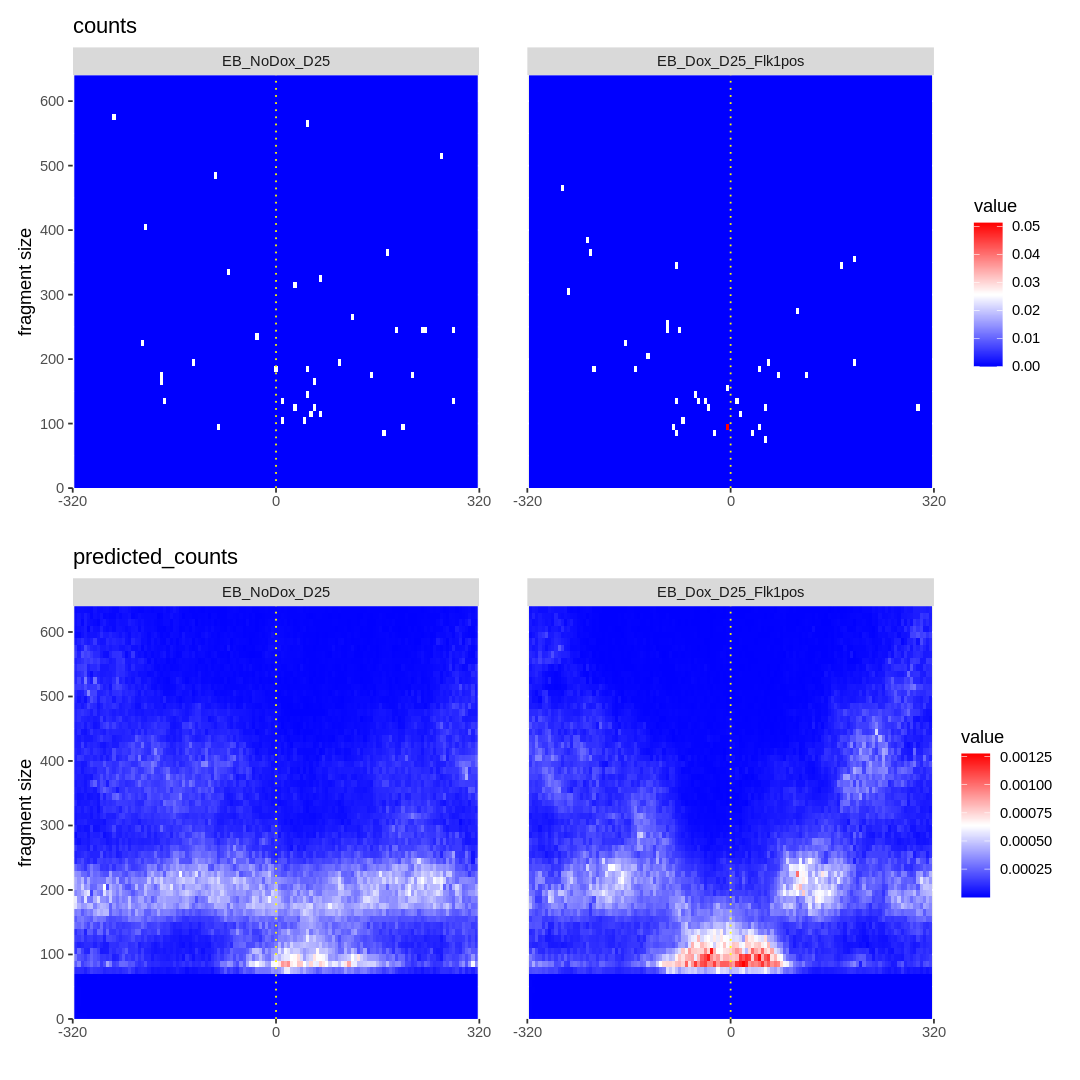

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 9)
p1 <- vplot(x_pred, 'counts')
p2 <- vplot(x_pred, 'predicted_counts')
p1 / p2

## Read V-plot without binning

In [ ]:
x_full <- read_vplot(gr[i], filenames = local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = 1L, fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = 1L)

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_NoDox_D25.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam



In [ ]:
z <- assays(x_full, withDimnames = FALSE)[['counts']]

In [ ]:
df <- do.call('rbind', lapply(1:dim(x_full)['sample'], function(i){
    j <-  colData(x_full)$sample == i
    zi <- z[, j, drop = FALSE]
    w <- 1 / rowSums(zi)
    w[is.infinite(w)] <- 0
    zi <- Diagonal(x = w) %*% zi
    zi <- colSums(zi)
    zi <- zi / sum(zi)
    data.frame(
      value = zi,
      bin = x_full@dimdata$bin$position[colData(x_full)$bin][j],
      interval = x_full@dimdata$interval$center[colData(x_full)$interval][j],
      sample = x_full@dimdata$sample$name[colData(x_full)$sample][j]
    )
  })) %>%
    mutate(sample = factor(sample, x_full@dimdata$sample$name))

Warning message:
“Removed 1280 rows containing missing values (geom_raster).”


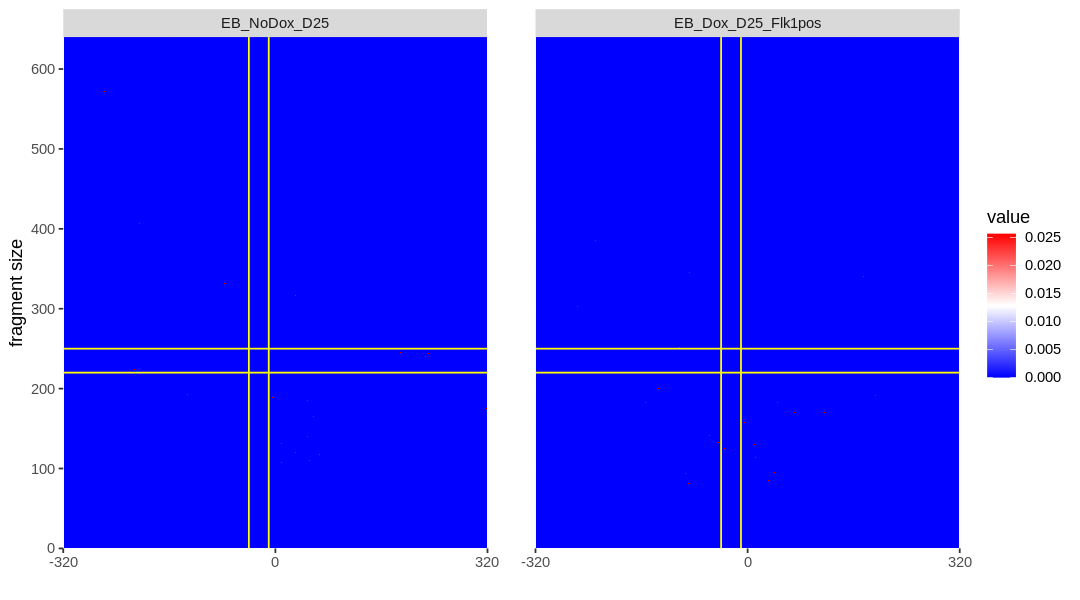

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 5)
df %>%
  ggplot(aes(x = .data$bin, y = .data$interval, fill = .data$value)) +
    geom_raster() +
    facet_wrap(vars(sample), ncol = 2L) +
    theme(panel.spacing = unit(2, 'lines')) +
    geom_vline(xintercept = c(-40, -10), color = 'yellow') +
    geom_hline(yintercept = c(220, 250), color = 'yellow') +
    scale_fill_gradientn(colors = colorpanel(100, low = 'blue', mid = 'white', high = 'red')) +
    scale_x_continuous(
      breaks = c(-x@window_size / 2, 0, x@window_size / 2),
      limits = c(-x@window_size / 2, x@window_size / 2),
      expand = c(0, 0)
    ) +
    scale_y_continuous(
      breaks = seq(x@fragment_size_range[1],  x@fragment_size_range[2], by = 100L),
      limits = range(x@fragment_size_range),
      expand = c(0, 0)
    ) +
      xlab('') + ylab('fragment size') 

## SessionInfo

In [ ]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] gplots_3.1.1                             
 [2] Matrix_1.4-0                             
 [3] RColorBrewer_1.1-2                       
 [4] clusterProfiler_4.2.2                    
 [5] ChIPseeker_1.30.3                        
 [6] org.Mm

In [ ]:
Sys.time() - start_time

Time difference of 4.105577 hours